In [1]:
import ast
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (adjusted_rand_score, normalized_mutual_info_score,
                             adjusted_mutual_info_score, calinski_harabasz_score)
import pandas as pd

In [2]:
genres = ['rock', 'classical', 'latin', 'filmi']
tracks = pd.read_csv('../data/tracks_with_genres.csv')
tracks['genres'] = tracks['genres'].apply(ast.literal_eval)
tracks = tracks.explode('genres')
tracks.rename(columns={'genres': 'genre'}, inplace=True)
tracks_subset = tracks[tracks['genre'].isin(genres)]

In [3]:
genres = tracks_subset['genre'].astype('category')
labels_integers = genres.cat.codes


## Data
A subset of the data has been used for clustering in this notebook.
The distribution of the data between genres can be seen in the following plot.

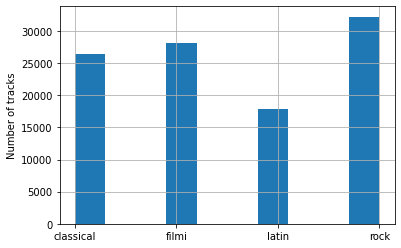

In total, there are 104438 tracks in the dataset used.


In [4]:
tracks_subset['genre'].hist()
plt.ylabel('Number of tracks')
plt.show()
print(f'In total, there are {tracks_subset.shape[0]} tracks in the dataset used.')

In [7]:
features = ['acousticness', 'instrumentalness', 'loudness', 'energy', 'danceability', 'valence']
X = tracks_subset[features]

#pca_X = PCA(n_components=2).fit_transform(X)
model = KMeans(n_clusters=4).fit(X)
print('ARI', adjusted_rand_score(labels_integers, model.labels_))
print('NMI', normalized_mutual_info_score(labels_integers, model.labels_))
print('AMI', adjusted_mutual_info_score(labels_integers, model.labels_))
print('Calinski Harabasz', calinski_harabasz_score(X, labels_integers))


ARI -1.2791611743040612
NMI 0.26363086106917827
AMI 0.2636065276691418
Calinski Harabasz 46954.324776430425


/home/jonathan/.virtualenvs/project/lib/python3.6/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
/home/jonathan/.virtualenvs/project/lib/python3.6/site-packages/sklearn/metrics/cluster/_supervised.py:390: RuntimeWarning: overflow encountered in long_scalars
  (tp + fp) * (fp + tn))
